In [66]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [26]:
from sklearn.datasets import load_iris


In [33]:

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [43]:
data = pd.read_csv('dc_combined.csv')


In [27]:
iris = load_iris()
X = iris.data
y = iris.target


In [30]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize kNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy
avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", avg_accuracy)

Average Accuracy: 0.9666666666666668


In [31]:
accuracy_scores

[1.0, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 98 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Seq                     1215675 non-null  int64  
 1   Dur                     1215675 non-null  float64
 2   RunTime                 1215675 non-null  float64
 3   Mean                    1215675 non-null  float64
 4   Sum                     1215675 non-null  float64
 5   Min                     1215675 non-null  float64
 6   Max                     1215675 non-null  float64
 7   sTos                    1215675 non-null  float64
 8   dTos                    1215675 non-null  float64
 9   sTtl                    1215675 non-null  float64
 10  dTtl                    1215675 non-null  float64
 11  sHops                   1215675 non-null  float64
 12  dHops                   1215675 non-null  float64
 13  TotPkts                 1215675 non-null  int64  
 14  Sr

In [45]:

def remove_attack_and_seq_labels(data):
    X =  data.loc[:,~data.columns.str.startswith('Atk')]
    X =  X.loc[:,~X.columns.str.startswith('Attack')]
    X =  X.loc[:,~X.columns.str.startswith('Label_')]
    X = X.drop(['Label', 'Seq'], axis=1)
    return X

In [46]:
X = remove_attack_and_seq_labels(data)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 77 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Dur              1215675 non-null  float64
 1   RunTime          1215675 non-null  float64
 2   Mean             1215675 non-null  float64
 3   Sum              1215675 non-null  float64
 4   Min              1215675 non-null  float64
 5   Max              1215675 non-null  float64
 6   sTos             1215675 non-null  float64
 7   dTos             1215675 non-null  float64
 8   sTtl             1215675 non-null  float64
 9   dTtl             1215675 non-null  float64
 10  sHops            1215675 non-null  float64
 11  dHops            1215675 non-null  float64
 12  TotPkts          1215675 non-null  int64  
 13  SrcPkts          1215675 non-null  int64  
 14  DstPkts          1215675 non-null  int64  
 15  TotBytes         1215675 non-null  int64  
 16  SrcBytes         1

In [47]:
def label_encoder(data, column_name):
  Y = data[column_name]
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(Y)
  return y_encoded

In [48]:
Y = label_encoder(data, 'Label')

In [49]:
def mutual_info(X, Y):
  mutual_info_arr = mutual_info_classif(X, Y)
  series_info = pd.Series(mutual_info_arr)
  series_info.index = X.columns
  series_top = series_info.sort_values(ascending=False)[:20]
  return series_top

In [50]:
result = mutual_info(X, Y)
     

<Axes: >

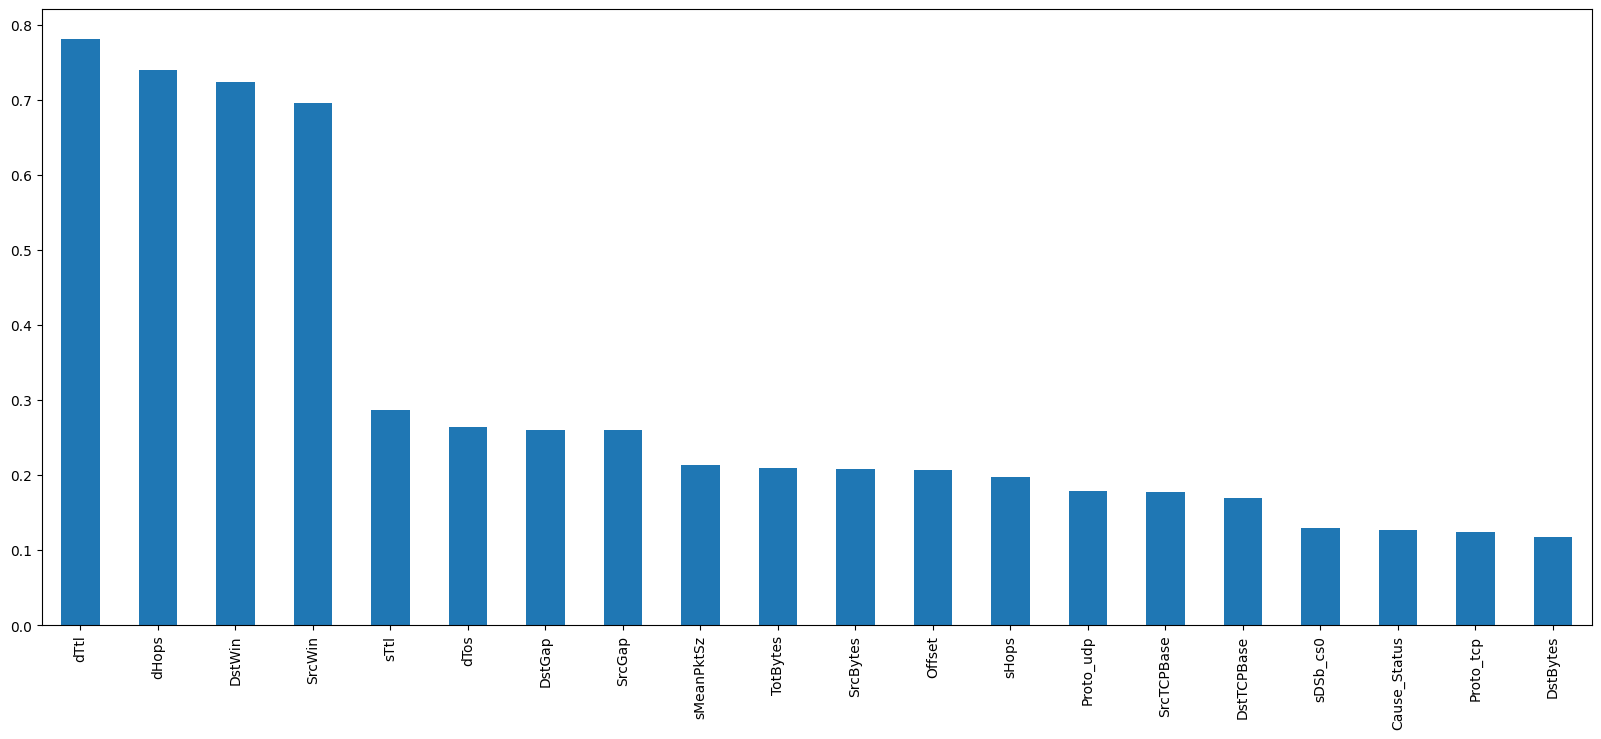

In [51]:
result.plot.bar(figsize=(20,8))


In [54]:
new_data = data[result.keys()]
new_data


,dTtl,dHops,DstWin,SrcWin,sTtl,dTos,DstGap,SrcGap,sMeanPktSz,TotBytes,SrcBytes,Offset,sHops,Proto_udp,SrcTCPBase,DstTCPBase,sDSb_cs0,Cause_Status,Proto_tcp,DstBytes
0,64.0,0.0,74432.548869,915681.012054,58.0,0.0,0.0,0.0,98.000000,98,98,128,6.0,0,2.044248e+09,2.145664e+09,1,0,0,0
1,64.0,0.0,74432.548869,915681.012054,58.0,0.0,0.0,0.0,98.000000,98,98,232,6.0,0,2.044248e+09,2.145664e+09,1,0,0,0
2,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1245.979614,249093,244212,336,11.0,1,2.044248e+09,2.145664e+09,1,0,0,4881
3,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1326.656494,221712,216245,440,11.0,1,2.044248e+09,2.145664e+09,1,0,0,5467
4,64.0,0.0,74432.548869,915681.012054,117.0,0.0,0.0,0.0,1351.583374,280216,275723,544,11.0,1,2.044248e+09,2.145664e+09,1,0,0,4493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215670,255.0,1.0,74432.928519,915740.586960,252.0,186.0,0.0,0.0,102.000000,200,102,190300,4.0,0,2.044248e+09,2.145664e+09,0,1,0,98
1215671,250.0,6.0,74432.907511,915737.284844,255.0,40.0,0.0,0.0,96.666664,3056,290,190392,1.0,0,2.044248e+09,2.145664e+09,0,1,0,2766
1215672,114.0,14.0,273.000000,213.000000,64.0,0.0,0.0,0.0,80.000000,252,160,190496,0.0,0,2.237373e+09,1.983280e+09,1,0,1,92
1215673,250.0,6.0,74432.907511,915737.284844,255.0,40.0,0.0,0.0,102.000000,596,306,190704,1.0,0,2.044248e+09,2.145664e+09,0,1,0,290


In [55]:
def min_max_normalisation(X):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaled_data = scaler.fit_transform(X)
  return scaled_data

In [56]:
normalised_data = min_max_normalisation(new_data)


In [ ]:
#Stratifies K fold 

In [58]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [60]:
X= normalised_data
y= Y

In [64]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [73]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize kNN classifier
    knn = KNeighborsClassifier(n_neighbors=20)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate evaluation metrics and store them
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))


In [68]:
# Calculate and print the average accuracy
avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", avg_accuracy)

Average Accuracy: 0.9995537458613528


In [69]:
accuracy_scores

[0.9995969317457379,
 0.9995969317457379,
 0.9994941082114874,
 0.999605157628478,
 0.9995516893906677,
 0.9994776564460074]

In [70]:
precision_scores

[0.9995971991337005,
 0.999494483918819,
 0.9996054022042862,
 0.9995520201464306,
 0.999478073823047]

In [71]:
recall_scores

[0.9995969317457379,
 0.9994941082114874,
 0.999605157628478,
 0.9995516893906677,
 0.9994776564460074]

In [72]:
f1_scores

[0.9995968951622995,
 0.9994940533715932,
 0.9996051232558122,
 0.9995516441213531,
 0.9994775969089443]

In [ ]:
#SVM

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize SVM classifier
    svm = SVC(kernel='rbf', C=1, gamma='auto')
    
    # Train the classifier
    svm.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm.predict(X_test)
    
    # Calculate evaluation metrics and store them
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))


In [ ]:
# Calculate and print the average accuracy
avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", avg_accuracy)